# **03 - Flights Dataset**
___

#### **Autor/es:**
- Peitsch, Pablo [[1]](#1)

**Fecha:** 2022-09-06

In [4]:
source('process.r')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [5]:
head(flights, 5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


#### Se estudian debajo las demoras en despegue y arribo en función del mes.

In [12]:
options(repr.plot.width=16, repr.plot.height=24)
jpeg(file=file.path(fig_folder, fig1_name), width=800, height=1200)
p1
dev.off()

Warning message:
"Removed 17685 rows containing missing values (stat_boxplot)."

png 
  2

#### **_Figura 1._** Distribución del retraso en la partida y el arribo de los vuelos en los meses del año 2013.

In [21]:
flights_melted_2 <- subset(flights_grouped, select= -c(month)) %>% melt(id="carrier")
flights_grouped_carrier <- group_by(flights_melted_2, variable)

#### En principio, pareciera que los retrasos se dan mayormente en algunos meses que en otros. Se compara, a continuación, las demoras en despegue y arribo para las distintas aerolineas.

Warning message:
"Removed 17685 rows containing missing values (stat_boxplot)."

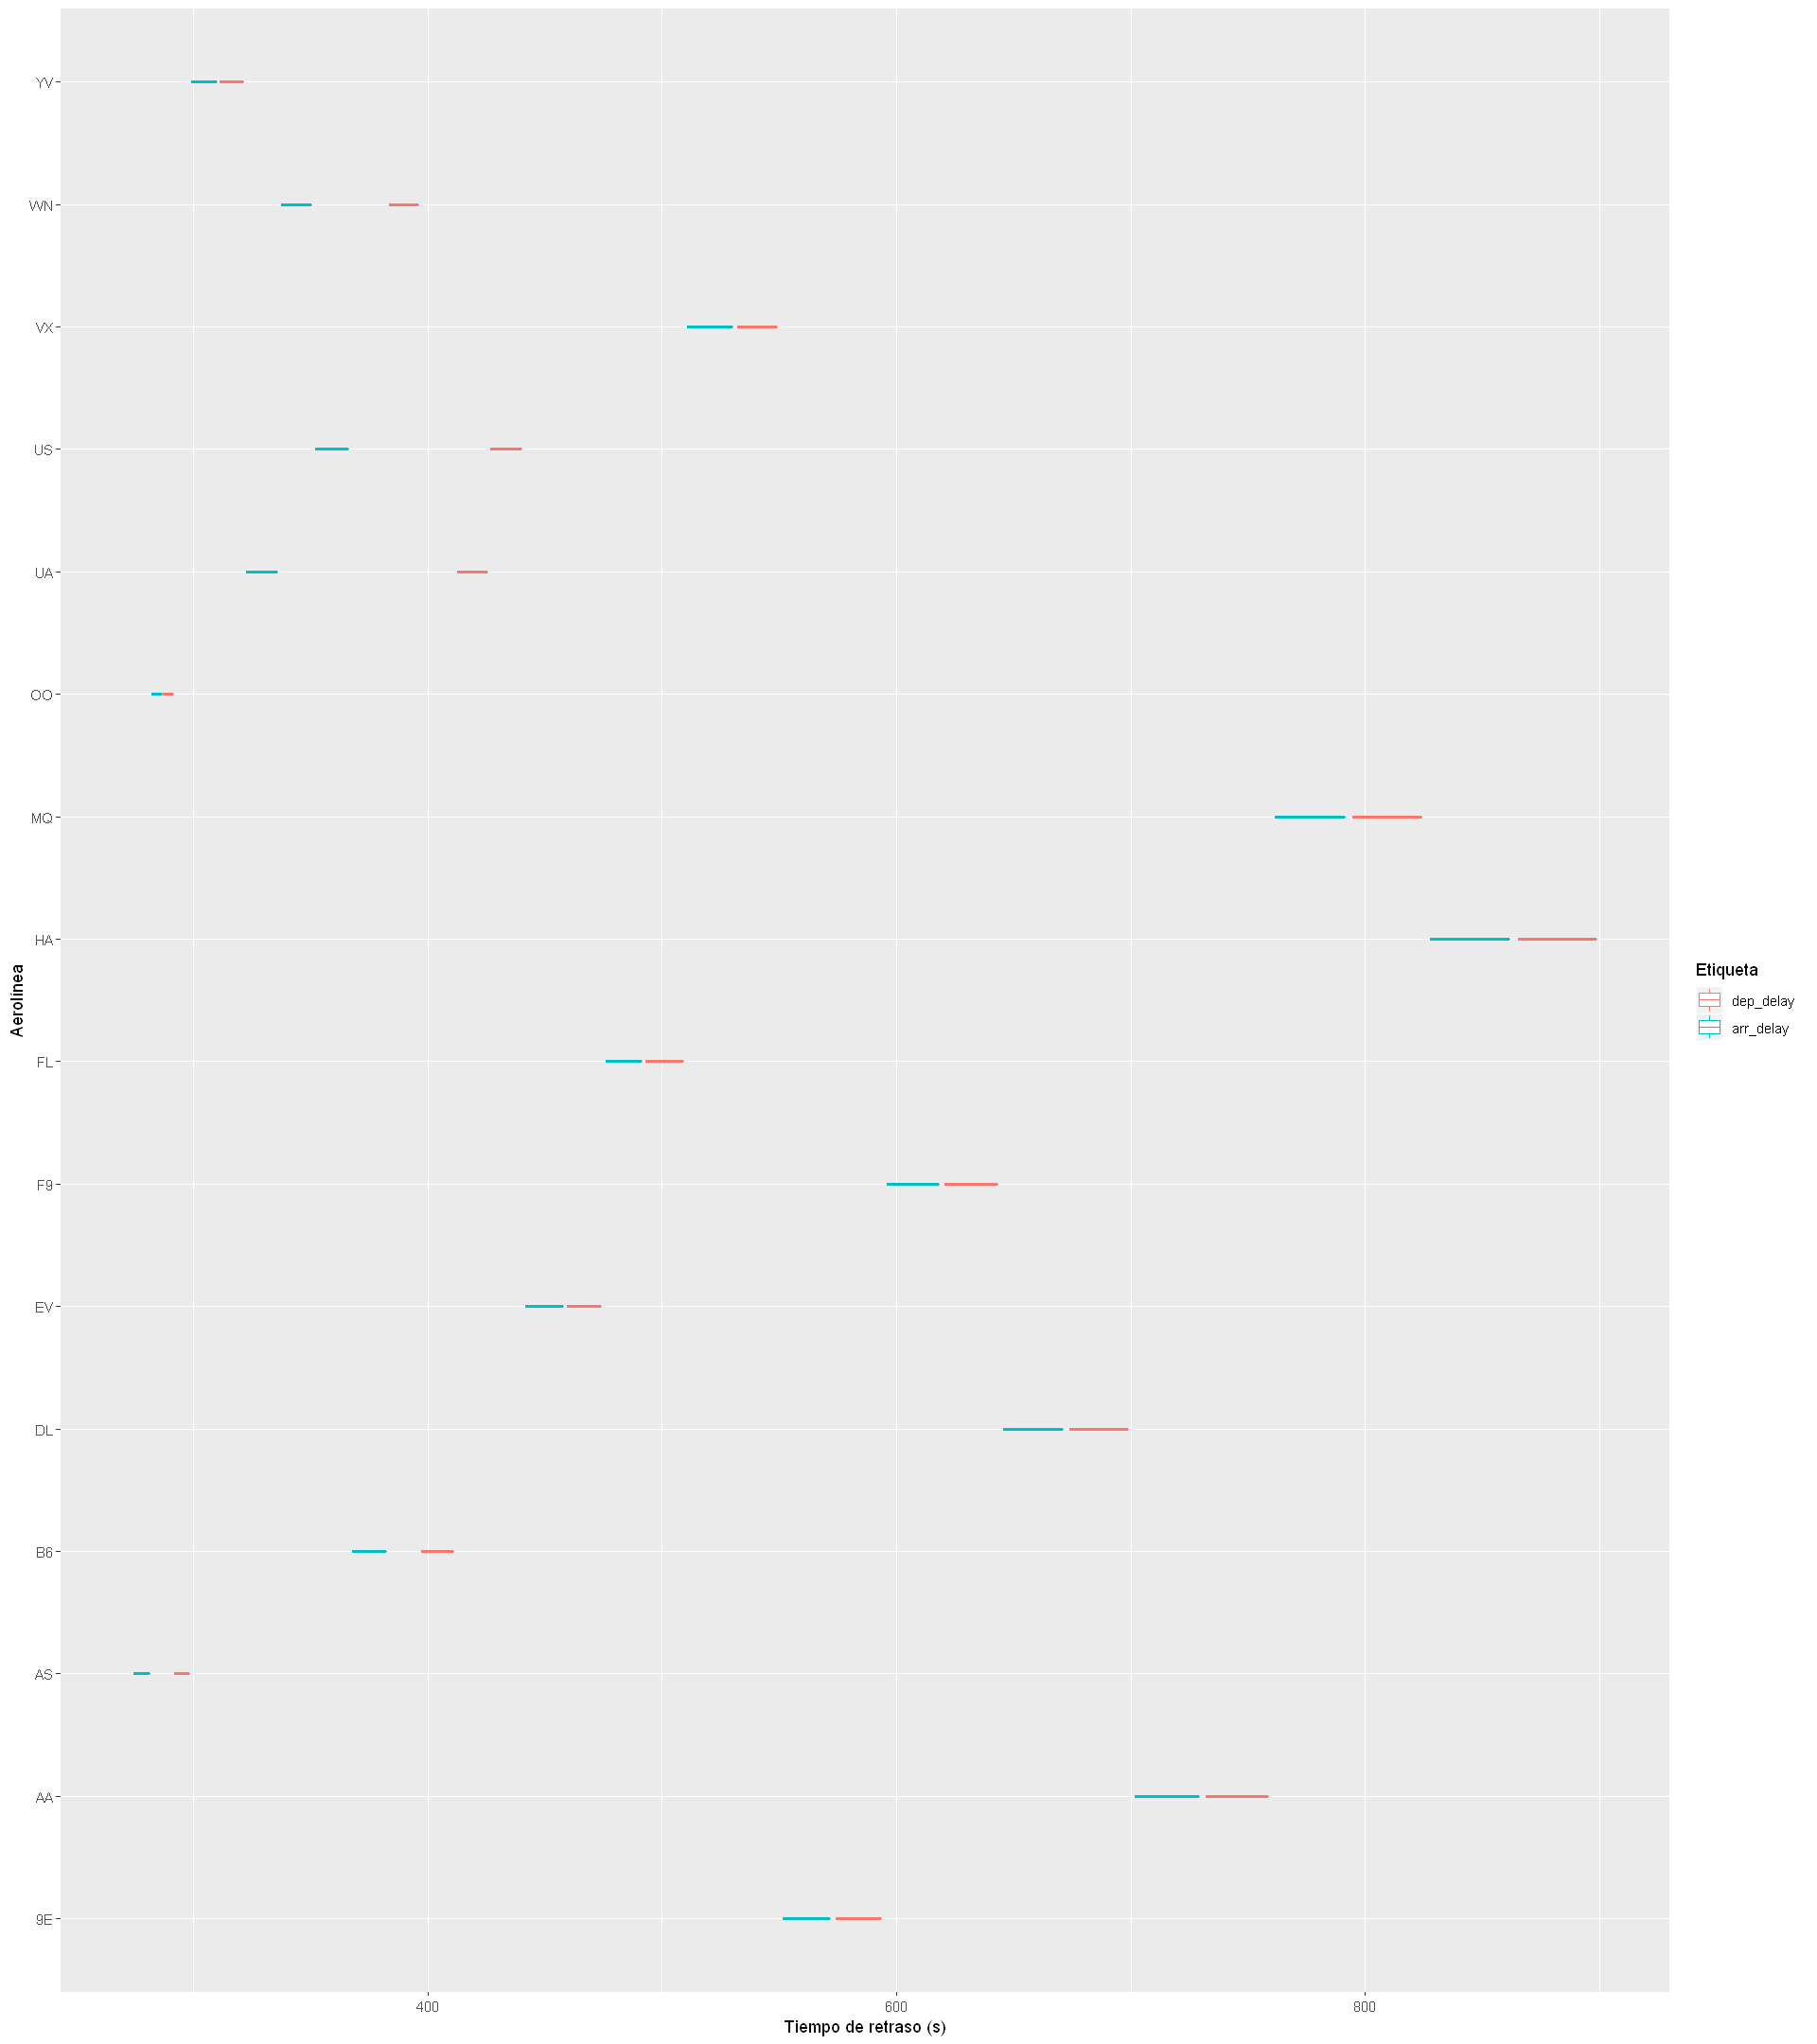

In [22]:
# Cambia tamaño del plot
options(repr.plot.width=16, repr.plot.height=18)
ggplot(data=flights_grouped_carrier,
       aes(
           x=value,
           y=factor(carrier),
           color=factor(variable)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +

    labs(
        x = 'Tiempo de retraso (s)',
        #title = 'Distribución por mes de retraso de vuelos en 2013',
        color = 'Etiqueta'
        ) +
    #scale_color_discrete(label=months_) +
    scale_y_discrete('Aerolínea', label=carriers_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30))

#### **_Figura 2._** Distribución del retraso en partidas y arribos de los vuelos para las distintas compañías en el año 2013.

#### Se puede obserbar en la Fig. 2, que los retrasos predominan en algunas aerolíneas más que en otras. Intentamos evaluar si hay retrasos por aerolineas en algún mes en particular.

In [9]:
flights_melted_3 <- melt(flights_grouped, id=c("carrier", "month"))
flights_grouped_ <- group_by(flights_melted_3, month)

Warning message:
"Removed 17685 rows containing non-finite values (stat_boxplot)."


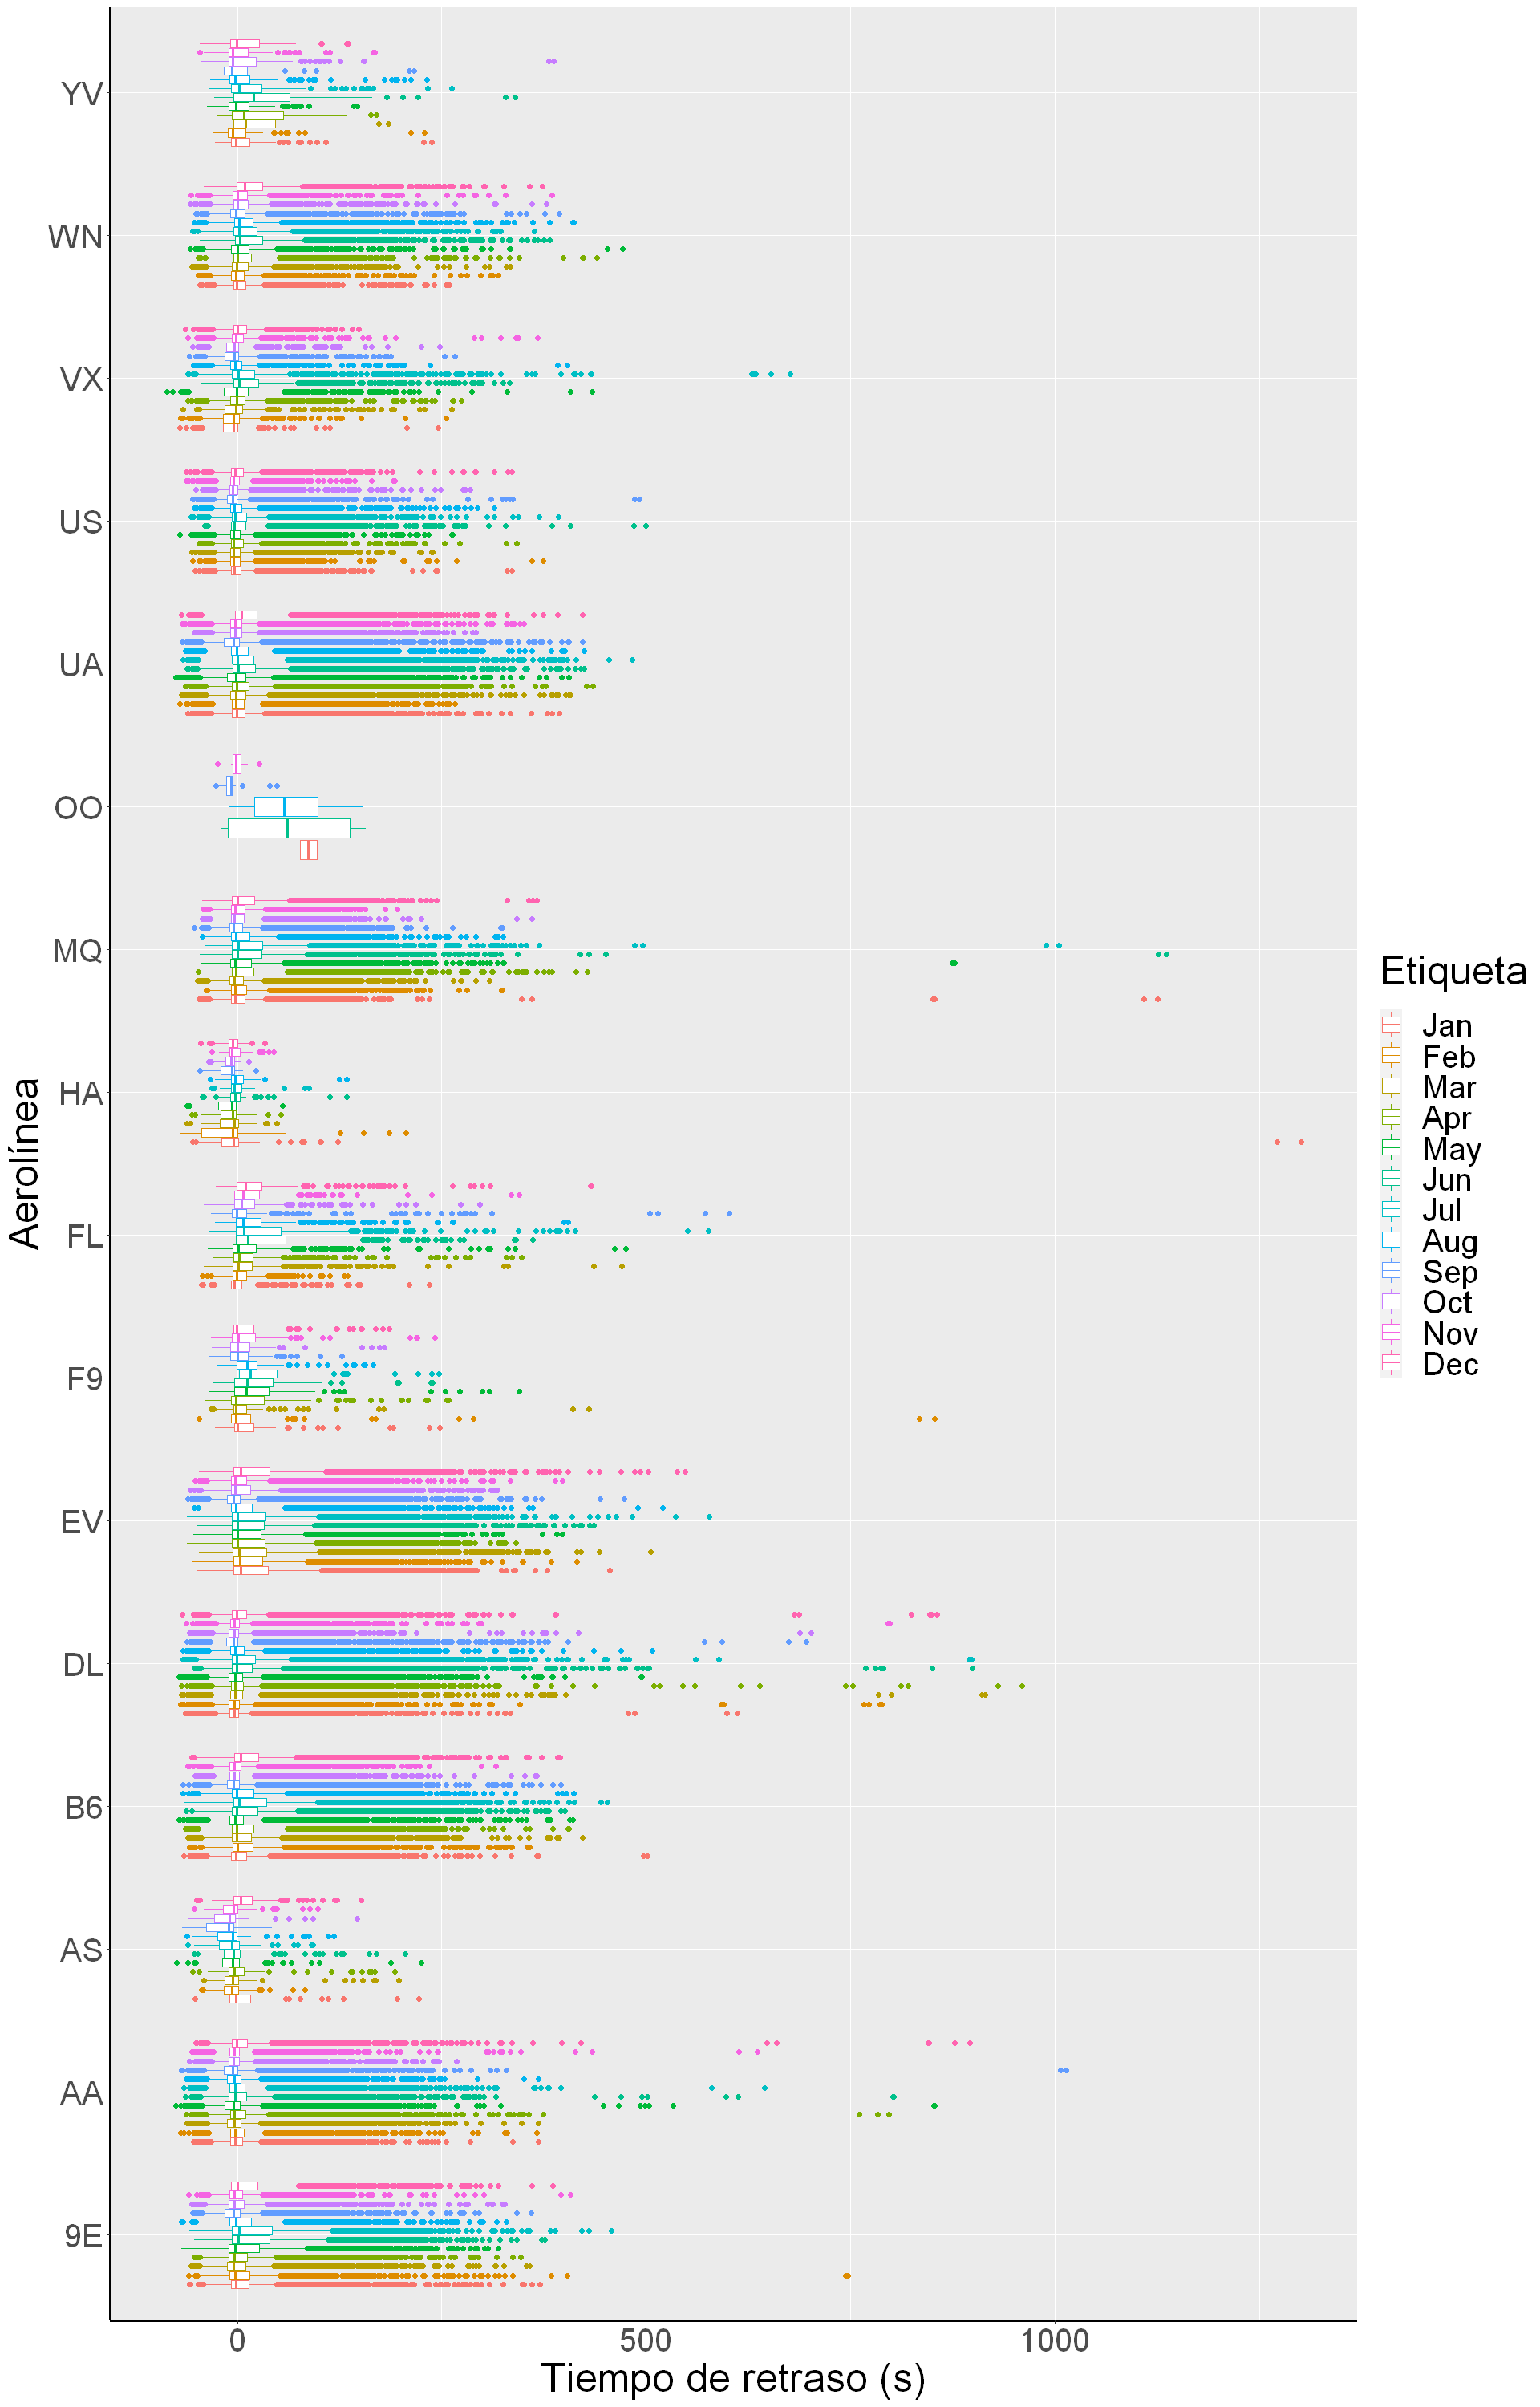

In [10]:
# Cambia tamaño del plot
options(repr.plot.width=16, repr.plot.height=25)

ggplot(data=flights_grouped_,
       aes(
           x=value,
           y=factor(carrier),
           color=factor(month)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +
    labs(
        x = 'Tiempo de retraso (s)',
        color = 'Etiqueta'
        ) +
    scale_color_discrete(label=months_) +
    scale_y_discrete('Aerolínea', label=carriers_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30))

#### **_Figura 3._** Distribución del retraso en partidas y arribos de los vuelos para las distintas compañías en el año 2013, evaluados epor mes.

#### Se puede observar claramente que algunas presentan pocos retrasos, así como otras retrasos importantes, predominando particularmente en algunos meses. Aún así, se hace difícil observar esto en un gráfico demasiado cargado. Por lo que es conveniente, quizás, realizar el análisis por aerolíneas.

In [11]:
flights_reduced <- filter(flights_melted_3, carrier==c('AS', 'FL', 'YV'))

Warning message in carrier == c("AS", "FL", "YV"):
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"


Warning message:
"Removed 90 rows containing non-finite values (stat_boxplot)."


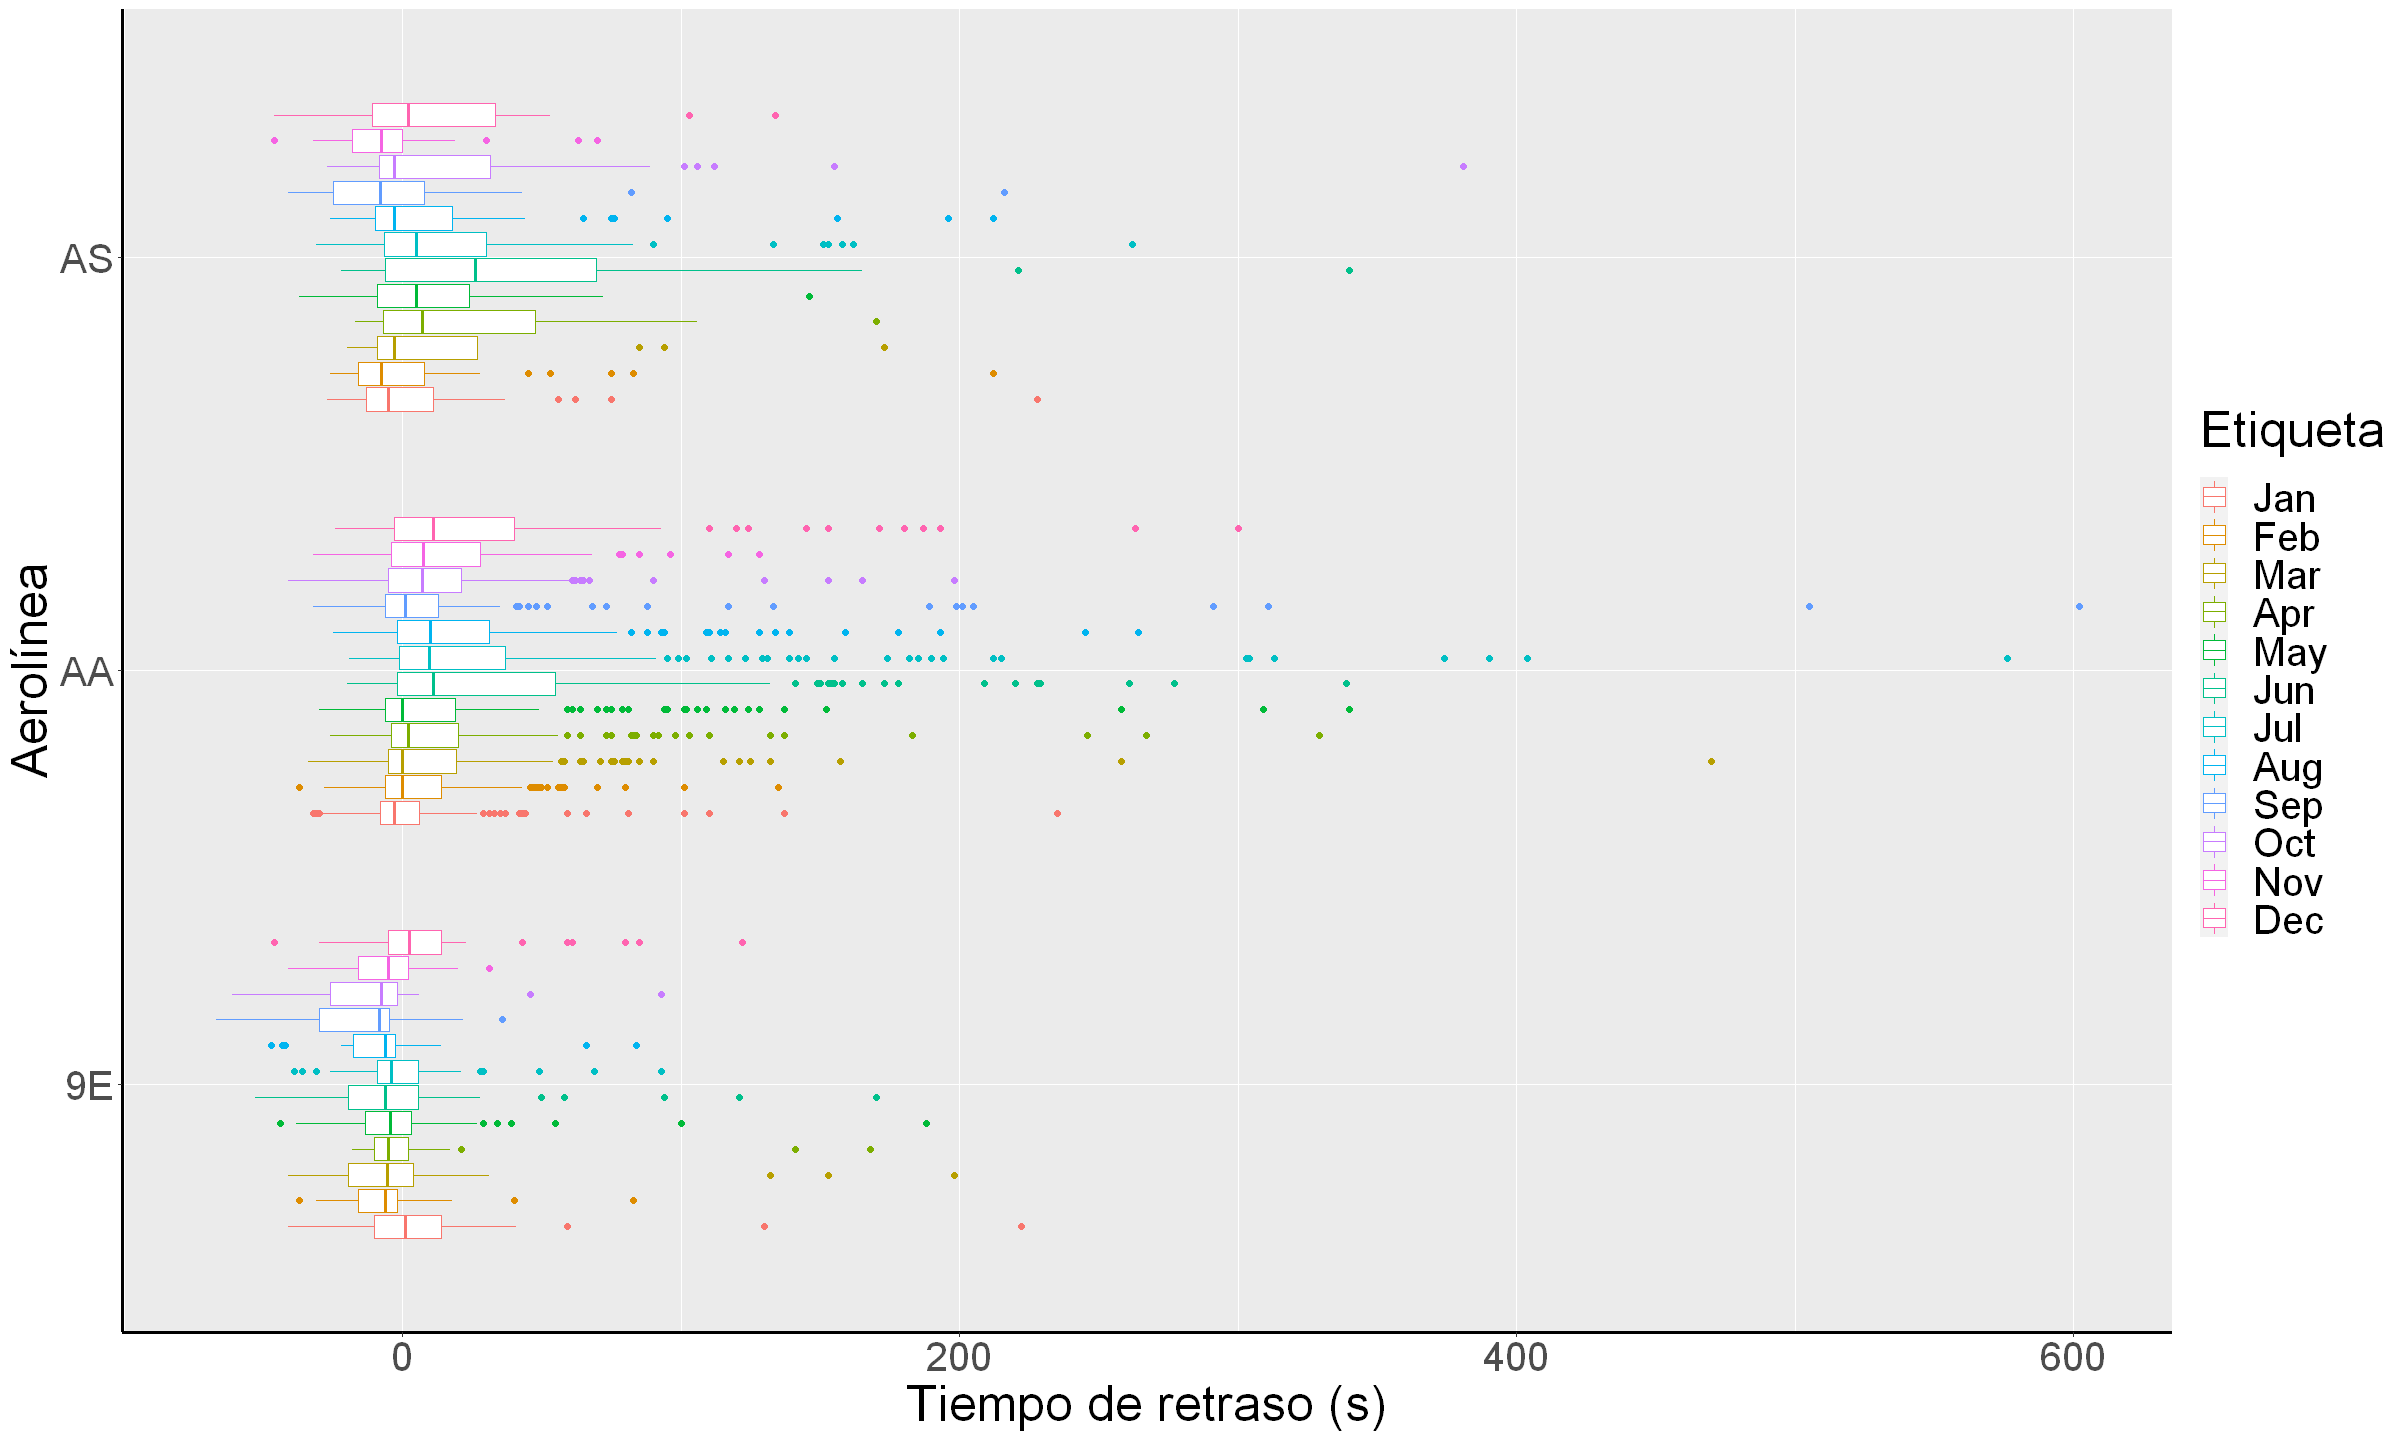

In [12]:
# Cambia tamaño del plot
options(repr.plot.width=20, repr.plot.height=12)

ggplot(data=flights_reduced,
       aes(
           x=value,
           y=factor(carrier),
           color=factor(month)
       )) +
    # Colores y forma del boxplot
    geom_boxplot() +
    labs(
        x = 'Tiempo de retraso (s)',
        color = 'Etiqueta'
        ) +
    scale_color_discrete(label=months_) +
    scale_y_discrete('Aerolínea', label=carriers_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30))

#### **_Figura 4._** Distribución del retraso en partidas y arribos de los vuelos para tres compañías (AS, AA y 9E) en el año 2013, evaluados por mes.

#### De estas aerolíneas seleccionamos una y nos concentramos en obtener algunos estadísticos para agregarlos al gráfico.

In [13]:
flights_melted_4 <- flights_grouped[complete.cases(flights_grouped), ]
flights_metricas <- filter(flights_melted_4, carrier==c('FL')) %>% group_by(month, carrier) %>%
                    summarise(
                                media_arr_delay=mean(arr_delay),
                                media_dep_delay=mean(dep_delay),
                                mediana_arr_delay=median(arr_delay),
                                mediana_dep_delay=median(dep_delay),
                                sd_arr_delay=sd(arr_delay),
                                sd_dep_delay=sd(dep_delay)
                                #iqr_arr_delay=iqr(arr_delay),
                                #iqr_dep_delay=iqr(dep_delay),
                                )# %>% filter(carrier==c('AS', 'FL', 'YV')) %>% melt(id=c("carrier", "month"))

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


In [14]:
flights_metricas

month,carrier,media_arr_delay,media_dep_delay,mediana_arr_delay,mediana_dep_delay,sd_arr_delay,sd_dep_delay
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FL,3.317901,1.972222,-1.0,-4,28.27159,23.75343
2,FL,4.248227,5.180851,0.0,-1,23.50321,19.16939
3,FL,16.132013,16.600660,2.0,1,49.91027,48.44949
4,FL,19.310231,12.920792,8.0,-1,46.28221,43.88780
5,FL,18.332298,19.183230,3.0,0,54.28187,52.08537
6,FL,41.966805,38.045643,16.0,10,67.00005,64.24233
7,FL,44.967742,41.745968,11.5,6,84.98582,84.87927
8,FL,24.835294,23.454902,9.0,5,50.90771,50.91158
9,FL,15.071146,17.039526,0.0,-1,67.80149,69.00183


In [15]:
uu <- melt(flights_metricas, id=c("carrier", "month"))

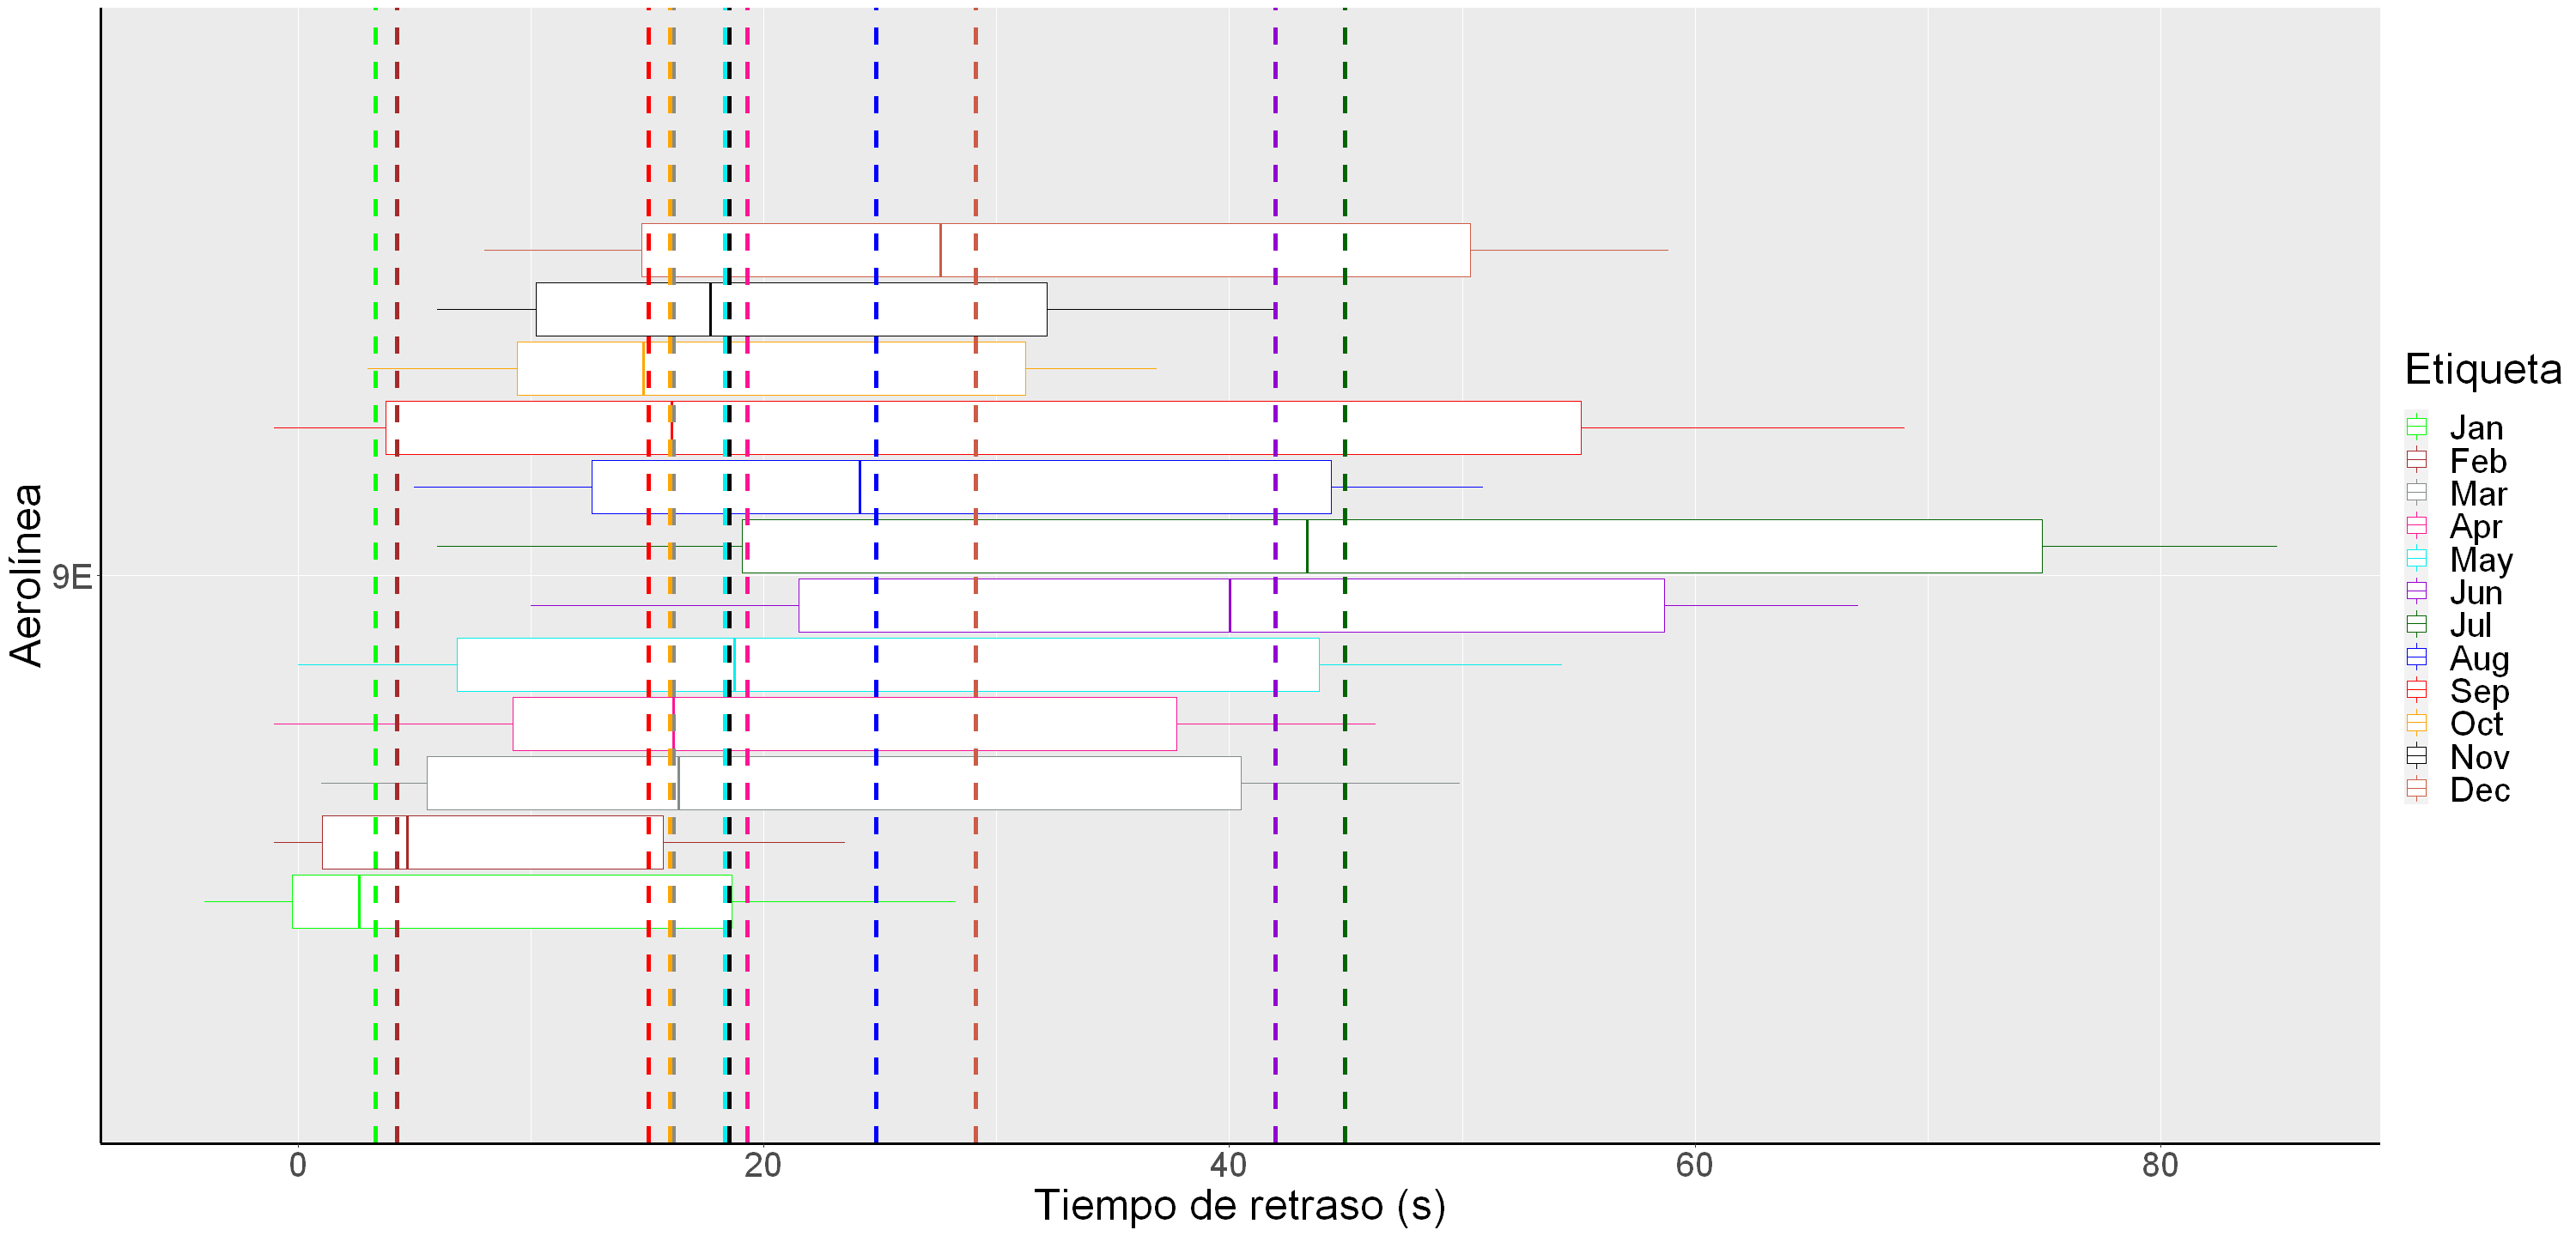

In [59]:
# Cambia tamaño del plot
options(repr.plot.width=25, repr.plot.height=12)
# Se establece el color manualmente para usar en etiquetas y líneas verticales
m_color = c('green', 'brown', 'azure4', 'deeppink', 'cyan2', 'darkviolet',
            'darkgreen', 'blue', 'red', 'orange', 'black', 'coral3')

p <- ggplot(uu,
       aes(
           x=value,
           y=factor(carrier),
           color=factor(month)
       )) +
    scale_color_manual(values=m_color, label=months_) +
    # Colores y forma del boxplot
    geom_boxplot() +
    labs(
        x = 'Tiempo de retraso (s)',
        color = 'Etiqueta'
        ) +
    scale_y_discrete('Aerolínea', label=carriers_) +
    theme(axis.line = element_line(colour = "black", size = 1), text = element_text(size = 30))
p + geom_vline(xintercept = flights_metricas$media_arr_delay, lty=2, color=m_color, size=1.5)


#p + geom_point(aes(c=flights_metricas$media_dep_delay, y=factor(flights_metricas$carrier)))
#p + geom_jitter()

#### ***Figura 5.*** Distribución del retraso en partidas y arribos de los vuelos para la compañía 9E en el año 2013, evaluada por mes.

### **Datos:**

#### <a id="1"></a> Pablo Peitsch
#### Mis repositorios de Github: <a href="https://github.com/PPeitsch">@PPeitsch</a>